In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
image_size = 160

train_data = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/train',
                                                                 image_size=(image_size, image_size))

val_data = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/validation',
                                                                 image_size=(image_size, image_size))

test_data = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/test',
                                                                 image_size=(image_size, image_size))

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


## Visualization

In [3]:
class_name = train_data.class_names
print(class_name)
print(len(class_name) , "Classes")

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
36 Classes


In [4]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

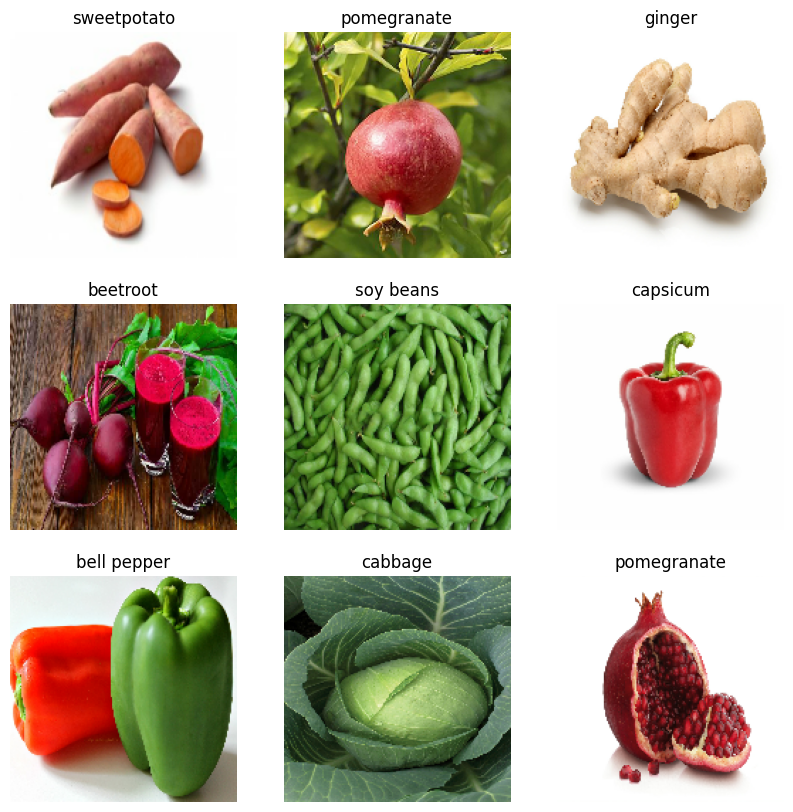

In [5]:
plt.figure(figsize=(10, 10))

for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_name[labels[i]])
    plt.axis('off')

## Pre Processing

In [6]:
for image_batch, label_batch in train_data:
  print("Image Batch Shape :", image_batch.shape)
  print("Image Labels Shape :", label_batch.shape)
  break
  
print("\nImage before formating : ")
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Image Batch Shape : (32, 160, 160, 3)
Image Labels Shape : (32,)

Image before formating : 
0.0 253.75003


In [7]:
first_image.shape

TensorShape([160, 160, 3])

In [8]:
def format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  return image, label

In [9]:
train = train_data.map(format)
validation = val_data.map(format)
test = test_data.map(format)

In [10]:
for image_batch, label_batch in train:
  print("Image Batch Shape :", image_batch.shape)
  print("Image Labels Shape :", label_batch.shape)
  break
  
print("\nImage after formating : ")
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Image Batch Shape : (32, 160, 160, 3)
Image Labels Shape : (32,)

Image after formating : 
0.003921569 1.0


In [11]:
# For Traditional Machine Learning Approach we do not need batches
# Appending all of the batches
train_images = []
train_labels = []
for images, labels in train:
    for image in images:
        train_images.append(image)
    for label in labels:
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print("Train Images Shape :", train_images.shape)
print("Train Labels Shape :", train_labels.shape)

Train Images Shape : (3115, 160, 160, 3)
Train Labels Shape : (3115,)


In [12]:
val_images = []
val_labels = []
for images, labels in validation:
    for image in images:
        val_images.append(image)
    for label in labels:
        val_labels.append(label)

val_images = np.array(val_images)
val_labels = np.array(val_labels)
print("Validation Images Shape :", val_images.shape)
print("Validation Labels Shape :", val_labels.shape)

Validation Images Shape : (351, 160, 160, 3)
Validation Labels Shape : (351,)


In [13]:
test_images = []
test_labels = []
for images, labels in test:
    for image in images:
        test_images.append(image)
    for label in labels:
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)
print("Test Images Shape :", test_images.shape)
print("Test Labels Shape :", test_labels.shape)

Test Images Shape : (359, 160, 160, 3)
Test Labels Shape : (359,)


## KNN Classifier

For n = 1
Validation Accuracy: 0.9658119658119658
For n = 2
Validation Accuracy: 0.8148148148148148
For n = 3
Validation Accuracy: 0.7635327635327636
For n = 4
Validation Accuracy: 0.7150997150997151
For n = 5
Validation Accuracy: 0.6524216524216524
For n = 6
Validation Accuracy: 0.6011396011396012
For n = 7
Validation Accuracy: 0.5641025641025641
For n = 8
Validation Accuracy: 0.5242165242165242
For n = 9
Validation Accuracy: 0.5128205128205128
For n = 10
Validation Accuracy: 0.49002849002849



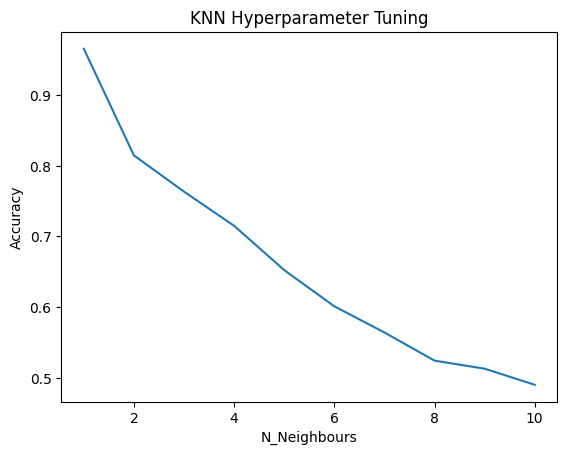

In [14]:
# Hyper Parameter Tuning
from sklearn.neighbors import KNeighborsClassifier

index = []
accuracies = []

for n in range(1, 11):
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

    # Evaluate model
    val_pred = knn.predict(val_images.reshape(val_images.shape[0], -1))
    accuracy = np.mean(val_pred == val_labels)
    print("For n =", n)
    print("Validation Accuracy:", accuracy)

    # For Graph Plot
    index.append(n)
    accuracies.append(accuracy)

# Visualization
print()
plt.plot(index, accuracies)
plt.xlabel("N_Neighbours")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.show()

In [16]:
# Tuned KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

# Evaluate model
val_pred = knn.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = knn.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)
     

Validation Accuracy: 0.9658119658119658
Testing Accuracy: 0.9665738161559888


 ## Random Forest Classifier Model

For n = 5
Validation Accuracy: 0.9458689458689459
For n = 10
Validation Accuracy: 0.9601139601139601
For n = 15
Validation Accuracy: 0.9601139601139601
For n = 20
Validation Accuracy: 0.9601139601139601
For n = 25
Validation Accuracy: 0.9601139601139601
For n = 30
Validation Accuracy: 0.9601139601139601
For n = 35
Validation Accuracy: 0.9601139601139601



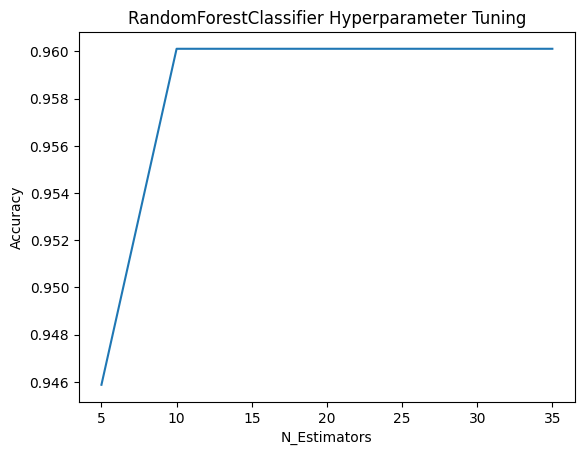

In [17]:
# Hyper Parameter Tuning
from sklearn.ensemble import RandomForestClassifier

index = []
accuracies = []

for n in range(5,40, 5):
  # Train RandomForestClassifier
  RF_model = RandomForestClassifier(n_estimators = n, random_state = 42)
  RF_model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

  # Evaluate model
  val_pred = RF_model.predict(val_images.reshape(val_images.shape[0], -1))
  accuracy = np.mean(val_pred == val_labels)
  print("For n =", n)
  print("Validation Accuracy:", accuracy)

  # For Graph Plot
  index.append(n)
  accuracies.append(accuracy)

# Visualization
print()
plt.plot(index, accuracies)
plt.xlabel("N_Estimators")
plt.ylabel("Accuracy")
plt.title("RandomForestClassifier Hyperparameter Tuning")
plt.show()

In [18]:
# Tuned RandomForestClassifier Model
RF_model = RandomForestClassifier(n_estimators = 25, random_state = 42)

RF_model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

# Evaluate model
val_pred = RF_model.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = RF_model.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)

Validation Accuracy: 0.9601139601139601
Testing Accuracy: 0.9610027855153204


## Naive Bayes

In [19]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_images.reshape(train_images.shape[0], -1), train_labels)
 
# Evaluate model
val_pred = gnb.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = gnb.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)

Validation Accuracy: 0.2678062678062678
Testing Accuracy: 0.26740947075208915


## Logistic Regression

In [20]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)


# Evaluate model
val_pred = model.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = model.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.9601139601139601
Testing Accuracy: 0.9610027855153204


## Ensemble Learning

In [21]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('RF', RF_model))
estimators.append(('KNN', knn))
estimators.append(('LR', model))

model_voting_classifier = VotingClassifier(estimators=estimators)
model_voting_classifier.fit(train_images.reshape(train_images.shape[0], -1), train_labels)


# Evaluate model
val_pred = model_voting_classifier.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = model_voting_classifier.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.9658119658119658
Testing Accuracy: 0.9665738161559888


## Prediction Analysis

Knn Prediction : apple

Random Forests Prediction : apple

Logistics Regression Prediction : apple

Voting Classifier Prediction : apple

Image : 


(-0.5, 159.5, 159.5, -0.5)

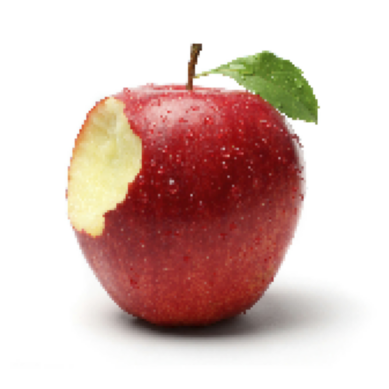

In [23]:
import tensorflow as tf

# read the image
img = tf.io.read_file('/kaggle/input/fruit-and-vegetable-image-recognition/test/apple/Image_1.jpg')
img = tf.image.decode_image(img, channels=3)
img = tf.image.resize(img, (160, 160))


# normalize the pixel values to be between 0 and 1
img = tf.cast(img, tf.float32)
img = img / 255.0
img = np.array(img)


pred = knn.predict(img.reshape(1, -1))
print("Knn Prediction :", class_name[pred[0]])
print()

pred = RF_model.predict(img.reshape(1, -1))
print("Random Forests Prediction :", class_name[pred[0]])
print()

pred = model.predict(img.reshape(1, -1))
print("Logistics Regression Prediction :", class_name[pred[0]])
print()

pred = model_voting_classifier.predict(img.reshape(1, -1))
print("Voting Classifier Prediction :", class_name[pred[0]])
print()

print("Image : ")
img = img * 255.0
plt.imshow(img.astype('uint8'))
plt.axis('off')

## Recipe generation by API

In [28]:
import requests

l = ['apples', 'mango']
s = ""
for i in l:
  s += ","
  s += i
s = s[1:]
print("Recipes with", s, ":")
print()

url = 'https://api.edamam.com/search?q='+s+'&app_id=0e9c7ea1&app_key=118a10fde8eab8f41b4c770d5f69a78a'
response = requests.get(url)

if response.status_code == 200:
    recipes = response.json()['hits']
    count = 1
    for recipe in recipes:
        print(count, ")" ,recipe['recipe']['label'], ":")
        ingr = ""
        for i in recipe['recipe']['ingredientLines']:
          ingr += ("    "+i+"\n")
        print("  Ingredients : ")
        print(ingr)
        print("  Image : ", recipe['recipe']['image'])
        print()
        print("  Source : ", recipe['recipe']['source'])
        print()
        count += 1
else:
    print('Failed to get recipes:', response.status_code)

Recipes with apples,mango :

1 ) British-Style Mango Chutney Recipe :
  Ingredients : 
    1 tablespoon vegetable oil
    1/2 red onion, finely chopped
    1 medium clove garlic, finely chopped (about 1 teaspoon)
    1 inch piece of ginger, finely chopped
    1/2 teaspoon curry powder
    1/4 teaspoon turmeric powder
    1 mango, peeled and cut into 1/2 inch pieces (about 1 1/2 chunks)
    1/2 apple, peeled and grated (about 1/2 cup)
    1/4 cup cider vinegar
    1 tablespoon brown sugar
    1 tablespoon golden raisins
    Kosher salt and freshly ground black pepper

  Image :  https://edamam-product-images.s3.amazonaws.com/web-img/eb0/eb0afc5a3da314b96c62513273cb41fb.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIH%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJIMEYCIQDjMVyMhDoXdcVZebN4DmkmqUEaSQnZrTRWND9Avte1LQIhAJ5QjcXBRDIO0Me9biOGYMauHIK1AEcp7dmR6JIlcQbZKsIFCNn%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEQABoMMTg3MDE3MTUwOTg2Igwyp7YlqNKKmcJmSjsqlgVjpClj9ZDA1V6KVOAYMXG7qmIOp%2B780yuMVlGuNwgB2Yt9HwRL

## Saving The Model

In [29]:
# Saving the model
import pickle
pickle.dump(model_voting_classifier, open('model.pkl', 'wb'))

In [30]:
# Loading the model
img = img / 255.0
pickled_model = pickle.load(open('model.pkl', 'rb'))
pred = pickled_model.predict(img.reshape(1, -1))
print("Prediction :", class_name[pred[0]])

Prediction : apple


## Evaluation Metrics

In [ ]:
test_pred = model_voting_classifier.predict(test_images.reshape(test_images.shape[0], -1))

In [31]:
from sklearn.metrics import precision_score

print("Precision of the Model : ", precision_score(test_labels, test_pred, average="macro"))
     

Precision of the Model :  0.9689955106621773


In [32]:
from sklearn.metrics import recall_score

print("Recall of the Model : ", recall_score(test_labels, test_pred, average="macro"))

Recall of the Model :  0.9663580246913581


In [33]:
from sklearn.metrics import f1_score

print("F1-Score of the Model : ", f1_score(test_labels, test_pred, average="macro"))

F1-Score of the Model :  0.9660672527029597


Confusion Matrix : 
[[ 8  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]



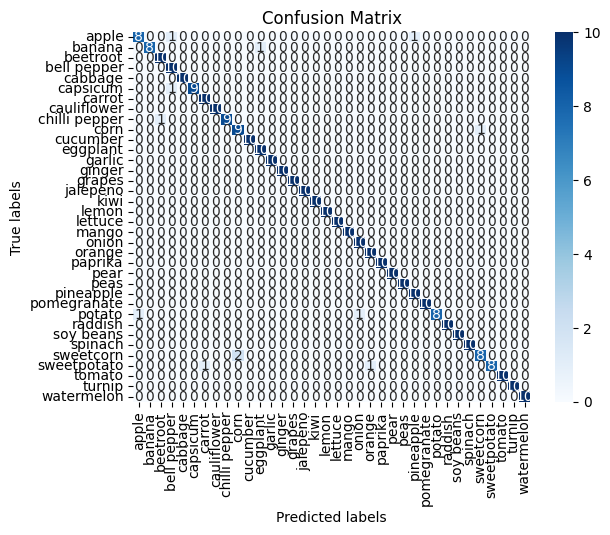

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, test_pred)

print("Confusion Matrix : ")
print(cm)
print()

import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_name, yticklabels=class_name)

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
len(class_name)

36